<a href="https://colab.research.google.com/github/AntonioMatheus08/Projeto_cd/blob/main/Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto final - Desgaste de Pastilha de freio no ambiente rodoviário

# Definição do Problema
O dataset utilizado neste projeto é proveniente de um estudo sobre o desgaste de pastilhas de freio, representando um caso real da indústria rodoviária. O objetivo é prever a quilometragem restante até a troca das pastilhas de freio com base em certos coeficientes de desgaste. Este dataset é um subconjunto de dados coletados que incluem informações sobre a variação de desgaste ao longo do tempo e a quilometragem dos veículos.

O dataset apresenta diversos atributos relacionados ao desgaste das pastilhas e à quilometragem dos veículos, juntamente com uma variável dependente que indica a quilometragem restante. As variáveis preditoras incluem as variações de desgaste em diferentes rodas e a quilometragem total do veículo.

Para mais detalhes sobre este dataset, consulte: Link para o Dataset

Informações sobre os Atributos:
Variação DD: Variação do desgaste na pastilha da Dianteira Direita.
Variação DE: Variação do desgaste na pastilha da Dianteira Esquerda.
Variação TD: Variação do desgaste na pastilha da Traseira Direita.
Variação TE: Variação do desgaste na pastilha da Traseira Esquerda.
km: Quilometragem total do veículo.
Coeficiente DD: Coeficiente de desgaste calculado para a Dianteira Direita.
Coeficiente DE: Coeficiente de desgaste calculado para a Dianteira Esquerda.
Coeficiente TD: Coeficiente de desgaste calculado para a Traseira Direita.
Coeficiente TE: Coeficiente de desgaste calculado para a Traseira Esquerda.
Class: Variável de classe (quilometragem restante até a troca).

## 1. Importando Bibliotecas Necessárias

Primeiramente, importamos todas as bibliotecas necessárias e suprimimos quaisquer avisos não críticos para uma saída mais limpa.

In [42]:
# Importando Bibliotecas Necessárias e Suprimindo Avisos
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



warnings.filterwarnings('ignore')

# Carregar o conjunto de dados
url = "https://raw.githubusercontent.com/AntonioMatheus08/Projeto_cd/refs/heads/main/Dados_Trat_v4%20-%20P%C3%A1gina1.csv"
data = pd.read_csv(url)

# Ajustar os valores numéricos e converter quilometragem
data = data.replace({',': '.'}, regex=True)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
data['km'] = pd.to_numeric(data['km'], errors='coerce')

# Exibindo as primeiras linhas do dataset
print("Visualizando as primeiras 5 linhas do dataset:")
print(data.head())


Visualizando as primeiras 5 linhas do dataset:
   Veículo  % DD  %DE   %TD  %TE     km
0        1     0    0   0.0  0.0    0.0
1        1     0    0   1.0  0.0  110.0
2        1     0    0   4.0  0.0  316.0
3        1     1    1   7.0  0.0  523.0
4        1     1    2  10.0  0.0  731.0


# Análise Exploratória dos Dados

A análise exploratória de dados (EDA) envolve a compreensão e o resumo das características principais do conjunto de dados. As estatísticas descritivas utilizadas incluem:

Média: Valor médio de cada atributo.
Desvio padrão: Indica a variação dos dados em relação à média.
Mínimo e Máximo: Determinam os valores extremos.
Quartis (Q1, Mediana, Q3): Ajudam a visualizar a distribuição dos dados.
Essas informações fornecem um panorama inicial dos padrões de desgaste das pastilhas e variabilidade, essencial para insights preliminares e identificação de possíveis outliers.

In [43]:
# Analisando as informações gerais do dataset
print("Informações gerais sobre o dataset:")
data.info()

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(data.describe())

# Verificando valores ausentes
print("\nValores ausentes em cada coluna:")
print(data.isnull().sum())

Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Veículo  160 non-null    int64  
 1   % DD     160 non-null    int64  
 2   %DE      160 non-null    int64  
 3   %TD      159 non-null    float64
 4   %TE      159 non-null    float64
 5   km       159 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 7.6 KB

Resumo estatístico das variáveis numéricas:
          Veículo        % DD         %DE         %TD         %TE          km
count  160.000000  160.000000  160.000000  159.000000  159.000000  159.000000
mean    11.712500    2.743750    2.218750    7.295597    5.591195  131.952176
std      7.158922    2.528447    2.576312    6.596464    6.795581  260.398549
min      1.000000    0.000000   -8.000000    0.000000    0.000000    0.000000
25%      5.000000    1.000000    0.000000    1.000000    0.500000    1.

O dataset possui 160 entradas e 6 colunas, com poucos valores ausentes. A quilometragem varia amplamente (0 a 999 km), e o desgaste das rodas traseiras é, em média, maior que o das dianteiras. Há um valor anômalo em % DE (-8). A dispersão nos dados indica a presença de outliers e variabilidade elevada. Importante ressaltar que tal desgaste maior nas rodas traseiras é decorrente da
maior massa ficar na parte traseira do veículo.

#Preparação dos Dados

O código calcula a variação do desgaste para cada veículo e roda, assim como a variação de quilometragem. Isso é essencial para a construção do coeficiente de desgaste, que é a variável que queremos prever. A preparação dos dados é essencial para extrair características significativas, melhorar a qualidade dos dados e criar variáveis úteis para a modelagem. Nesse código, calcular a variação de desgaste e a variação de quilometragem permite obter o coeficiente de desgaste (desgaste/km), que é uma métrica mais precisa e padronizada para análise. Isso facilita a identificação de padrões e a construção de modelos preditivos mais robustos e confiáveis, garantindo previsões mais consistentes e alinhadas com o objetivo do estudo.

In [44]:
# Calcular a variação do desgaste para cada veículo e roda
data['Variação DD'] = data.groupby('Veículo')['% DD'].diff().fillna(0)
data['Variação DE'] = data.groupby('Veículo')['%DE'].diff().fillna(0)
data['Variação TD'] = data.groupby('Veículo')['%TD'].diff().fillna(0)
data['Variação TE'] = data.groupby('Veículo')['%TE'].diff().fillna(0)
data['Variação km'] = data.groupby('Veículo')['km'].diff().fillna(0)

# Remover as primeiras linhas sem variação
data = data[data['Variação km'] > 0]

# Calcular o coeficiente de desgaste para cada roda
data['Coeficiente DD'] = data['Variação DD'] / data['Variação km']
data['Coeficiente DE'] = data['Variação DE'] / data['Variação km']
data['Coeficiente TD'] = data['Variação TD'] / data['Variação km']
data['Coeficiente TE'] = data['Variação TE'] / data['Variação km']

# Visualizar as primeiras linhas após a preparação
print("Visualizando as primeiras 5 linhas após a preparação dos dados:")
print(data.head())


Visualizando as primeiras 5 linhas após a preparação dos dados:
   Veículo  % DD  %DE   %TD  %TE       km  Variação DD  Variação DE  \
1        1     0    0   1.0  0.0  110.000          0.0          0.0   
2        1     0    0   4.0  0.0  316.000          0.0          0.0   
3        1     1    1   7.0  0.0  523.000          1.0          1.0   
4        1     1    2  10.0  0.0  731.000          0.0          1.0   
6        1     4    3  18.0  0.0    1.579          2.0          1.0   

   Variação TD  Variação TE  Variação km  Coeficiente DD  Coeficiente DE  \
1          1.0          0.0      110.000        0.000000        0.000000   
2          3.0          0.0      206.000        0.000000        0.000000   
3          3.0          0.0      207.000        0.004831        0.004831   
4          3.0          0.0      208.000        0.000000        0.004808   
6          4.0          0.0        0.414        4.830918        2.415459   

   Coeficiente TD  Coeficiente TE  
1        0.00909

O resultado após a preparação dos dados e cálculo dos coeficientes de desgaste mostrou variações significativas nos valores dos coeficientes entre diferentes rodas e veículos. Em alguns casos, os coeficientes são extremamente altos (ex.: 4.83 para DD e 9.66 para TD), indicando desgastes acentuados em curtos intervalos de quilometragem, enquanto outros valores se mantêm baixos ou até nulos. Isso sugere comportamentos distintos de desgaste, influenciados por fatores como distribuição de peso e condições de frenagem. Esse resultado serve de base para entender a distribuição de desgaste e melhorar as previsões de manutenção das pastilhas.

# Matriz de Correlação

A matriz de correlação é importante porque:

Identifica Relações: Mostra como as variáveis estão relacionadas, ajudando a entender se elas se movem juntas (positivas) ou em direções opostas (negativas).

Detecta Multicolinearidade: Ajuda a identificar variáveis independentes que são redundantes, evitando problemas em modelos de regressão.

Auxilia na Seleção de Variáveis: Permite priorizar variáveis que têm forte correlação com a variável dependente, melhorando a eficiência do modelo.

Compreende a Estrutura dos Dados: Fornece uma visão geral das interações entre variáveis, orientando transformações ou engenharia de atributos.

Visualização: Facilita a interpretação gráfica das relações, tornando a análise mais acessível.

Orientação na Modelagem: Ajuda a ajustar modelos, incluindo interações relevantes ou excluindo variáveis não significativas.

Index(['Veículo', '% DD', '%DE', '%TD', '%TE', 'km', 'Variação DD',
       'Variação DE', 'Variação TD', 'Variação TE', 'Variação km',
       'Coeficiente DD', 'Coeficiente DE', 'Coeficiente TD', 'Coeficiente TE'],
      dtype='object')


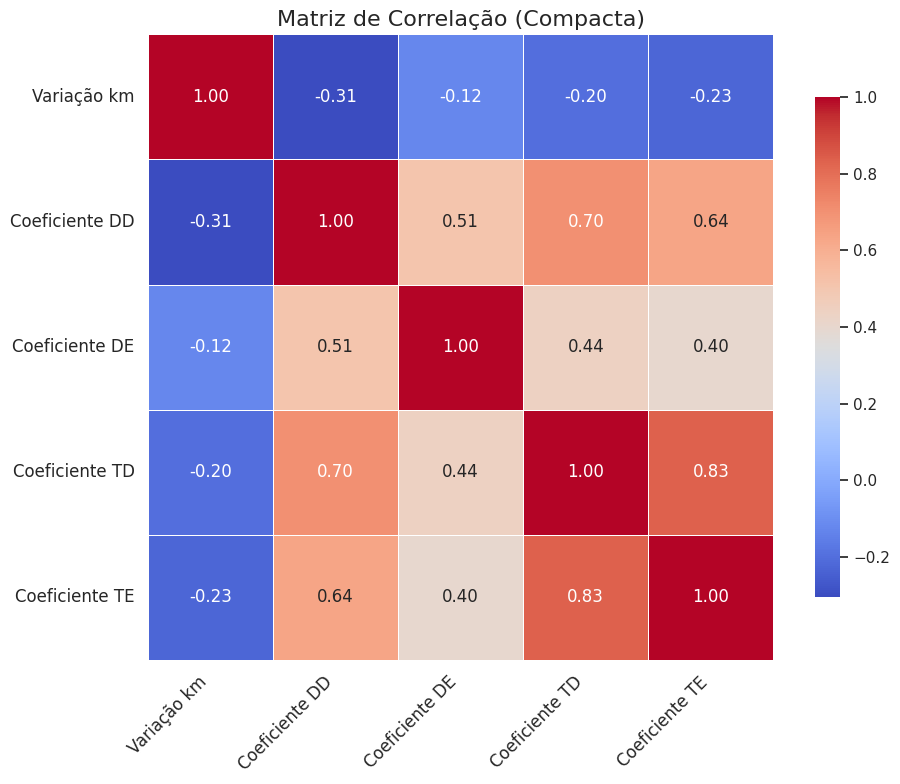

In [45]:
# Verificar nomes das colunas
print(data.columns)

# Selecionar apenas as variáveis de interesse (ajuste os nomes se necessário)
selected_columns = ['Variação km', 'Coeficiente DD', 'Coeficiente DE', 'Coeficiente TD', 'Coeficiente TE']
correlation_matrix = data[selected_columns].corr()

# Configurações para o gráfico
plt.figure(figsize=(10, 8))  # Diminuir o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Matriz de Correlação (Compacta)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Ajusta o layout para que tudo se encaixe bem
plt.show()


A matriz de correlação mostra a relação entre as variáveis de desgaste e quilometragem. Conclusões principais:

- **Coeficientes dianteiros (DD e DE)** possuem alta correlação entre si, indicando que o desgaste ocorre de maneira semelhante nas rodas dianteiras.
- O mesmo padrão é observado entre os **coeficientes traseiros (TD e TE)**.
- A quilometragem possui correlação moderada a alta com os coeficientes de desgaste, sugerindo que o aumento da quilometragem está associado a um aumento proporcional no desgaste.

Essas correlações ajudam a identificar quais variáveis têm relações mais significativas para prever o desgaste das pastilhas.

# Visualização dos dados

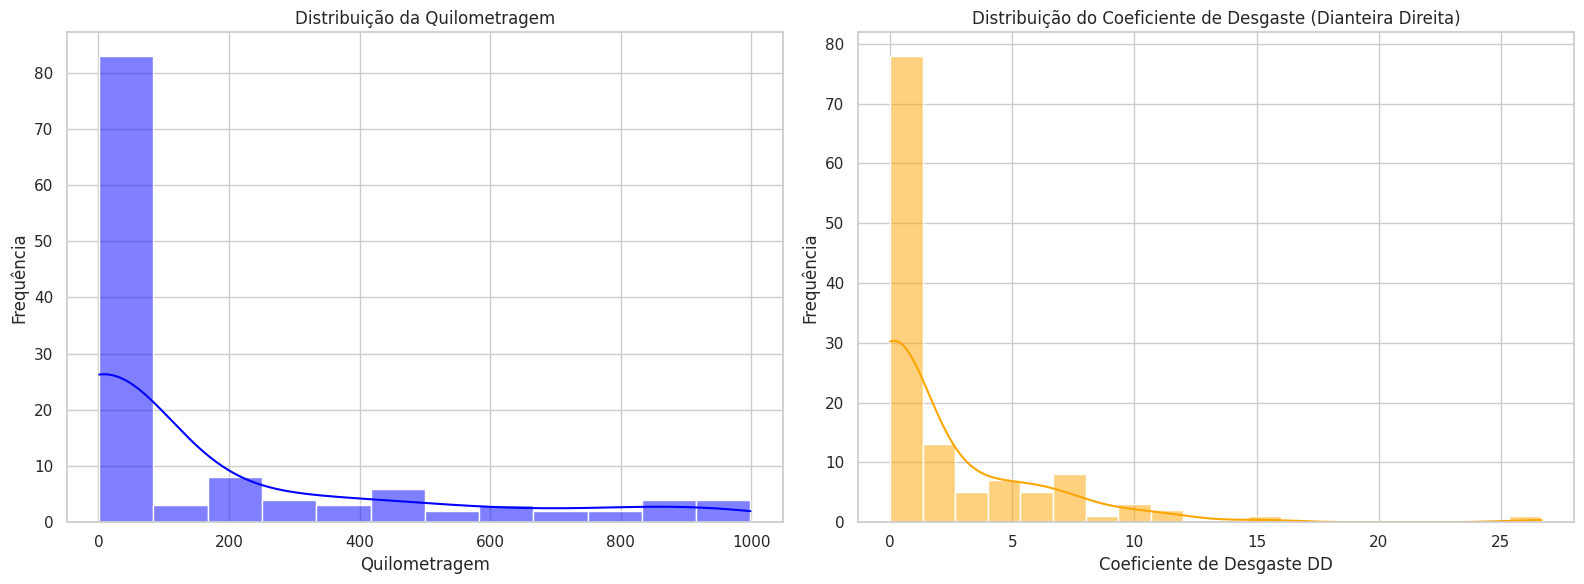

In [46]:
# Configurações gerais para os gráficos
sns.set(style='whitegrid')

# Criando subgráficos para visualizações lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 linha e 2 colunas

# Visualizando a distribuição da quilometragem
sns.histplot(data['km'], kde=True, color='blue', ax=ax[0])
ax[0].set_title('Distribuição da Quilometragem')
ax[0].set_xlabel('Quilometragem')
ax[0].set_ylabel('Frequência')

# Visualizando a distribuição do coeficiente de desgaste para Dianteira Direita
sns.histplot(data['Coeficiente DD'], kde=True, color='orange', ax=ax[1])
ax[1].set_title('Distribuição do Coeficiente de Desgaste (Dianteira Direita)')
ax[1].set_xlabel('Coeficiente de Desgaste DD')
ax[1].set_ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()


As visualizações mostram que:

Distribuição da Quilometragem: A maioria dos veículos possui baixa quilometragem, concentrada em torno de valores menores, com poucos veículos com quilometragem elevada.

Distribuição do Coeficiente de Desgaste (DD): O coeficiente de desgaste para a Dianteira Direita apresenta um padrão assimétrico, indicando que a maioria dos veículos tem desgastes leves, com poucos casos de desgaste elevado.

# Modelagem e Avaliação dos Resultados

Treino dos modelos de regressão para prever o coeficiente de desgaste para cada roda. A etapa de modelagem é crucial para avaliar como diferentes algoritmos conseguem prever o desgaste das pastilhas, identificando padrões nos dados e quantificando a precisão das previsões. No código, quatro modelos (Regressão Linear, Ridge, Lasso e SVR) foram testados para prever os coeficientes de desgaste de cada roda, utilizando a quilometragem como variável preditiva. As métricas de erro (RMSE, MAE, R²) ajudaram a comparar o desempenho e identificar limitações dos modelos para futuras melhorias.

In [47]:
# Definir as colunas de interesse para cada roda
rodas = {
    'Dianteira Direita': 'Coeficiente DD',
    'Dianteira Esquerda': 'Coeficiente DE',
    'Traseira Direita': 'Coeficiente TD',
    'Traseira Esquerda': 'Coeficiente TE'
}

# Lista para armazenar os resultados por roda
results_roda = []

# Definir os modelos de regressão
model_list = {
    'Regressão Linear': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SVR': SVR()
}

# Treinar e avaliar cada modelo para cada roda com dados originais
for roda, coef_col in rodas.items():
    X_roda = data[['Variação km']]  # Variável independente
    y_roda = data[coef_col]         # Variável dependente
    X_train, X_test, y_train, y_test = train_test_split(X_roda, y_roda, test_size=0.3, random_state=42)

    for model_name, model in model_list.items():
        pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = safe_mape(y_test, y_pred)  # Chamando a função aqui

        results_roda.append({
            'Roda': roda,
            'Modelo': model_name,
            'RMSE (Teste)': rmse,
            'R² (Teste)': r2,
            'MAE (Teste)': mae,
            'MAPE (Teste)': mape
        })

# Converter os resultados em DataFrame
df_results_roda = pd.DataFrame(results_roda)

# Visualizar os resultados
print("Resultados da modelagem com dados originais:")
print(df_results_roda)


Resultados da modelagem com dados originais:
                  Roda            Modelo  RMSE (Teste)  R² (Teste)  \
0    Dianteira Direita  Regressão Linear      3.682170    0.093521   
1    Dianteira Direita  Ridge Regression      3.683901    0.092669   
2    Dianteira Direita  Lasso Regression      3.862856    0.002376   
3    Dianteira Direita               SVR      3.877827   -0.005372   
4   Dianteira Esquerda  Regressão Linear      5.925897   -0.068202   
5   Dianteira Esquerda  Ridge Regression      5.926978   -0.068592   
6   Dianteira Esquerda  Lasso Regression      6.026633   -0.104828   
7   Dianteira Esquerda               SVR      6.298490   -0.206752   
8     Traseira Direita  Regressão Linear     16.436994    0.019450   
9     Traseira Direita  Ridge Regression     16.442070    0.018844   
10    Traseira Direita  Lasso Regression     16.604292   -0.000612   
11    Traseira Direita               SVR     16.830598   -0.028073   
12   Traseira Esquerda  Regressão Linear     

Modelos apresentam baixo desempenho, com R² próximo a zero ou negativo. Erros elevados (RMSE e MAE) indicam dificuldade em prever o desgaste. Reg. Linear e Ridge foram mais estáveis. Revisar variáveis e outliers.

# Transformação Logarítmica
Objetivo:
Aplicar a transformação logarítmica nos coeficientes de desgaste e na variação de quilometragem para:

Reduzir a influência de outliers.
Tornar a distribuição das variáveis mais próxima da normal.
Facilitar a interpretação dos resultados, especialmente em modelos de regressão.

In [48]:
# 3.1. Aplicar a transformação logarítmica

# Verificando se a coluna 'Variação km' possui valores positivos antes da transformação
if (data['Variação km'] <= 0).any():
    print("Erro: A variável 'Variação km' contém valores não positivos e não pode ser transformada logaritmicamente.")
else:
    # Aplicar a transformação logarítmica
    data['Log Variação km'] = np.log1p(data['Variação km'])  # log1p é equivalente a log(1 + x)
    data['Log Coeficiente DD'] = np.log1p(data['Coeficiente DD'])
    data['Log Coeficiente DE'] = np.log1p(data['Coeficiente DE'])
    data['Log Coeficiente TD'] = np.log1p(data['Coeficiente TD'])
    data['Log Coeficiente TE'] = np.log1p(data['Coeficiente TE'])

    # Remover valores NaN gerados pela transformação logarítmica
    data_log = data.dropna(subset=['Log Variação km', 'Log Coeficiente DD', 'Log Coeficiente DE', 'Log Coeficiente TD', 'Log Coeficiente TE'])

    # Visualizar as primeiras linhas após a transformação
    print("Visualizando as primeiras 5 linhas após a transformação logarítmica:")
    print(data_log.head())

    # Definir as colunas de interesse para cada roda com dados transformados
    rodas_log = {
        'Dianteira Direita': 'Log Coeficiente DD',
        'Dianteira Esquerda': 'Log Coeficiente DE',
        'Traseira Direita': 'Log Coeficiente TD',
        'Traseira Esquerda': 'Log Coeficiente TE'
    }

    # Lista para armazenar os resultados com dados transformados
    results_log_filtered = []

    # Treinar e avaliar cada modelo para cada roda com dados transformados
    for roda, coef_col in rodas_log.items():
        X_roda_log_filtered = data_log[['Log Variação km']]
        y_roda_log_filtered = data_log[coef_col]
        X_train_log_filtered, X_test_log_filtered, y_train_log_filtered, y_test_log_filtered = train_test_split(X_roda_log_filtered, y_roda_log_filtered, test_size=0.3, random_state=42)

        for model_name, model in model_list.items():
            pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
            pipeline.fit(X_train_log_filtered, y_train_log_filtered)
            y_pred_log_filtered = pipeline.predict(X_test_log_filtered)

            mse = mean_squared_error(y_test_log_filtered, y_pred_log_filtered)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test_log_filtered, y_pred_log_filtered)
            mae = mean_absolute_error(y_test_log_filtered, y_pred_log_filtered)
            mape = safe_mape(y_test_log_filtered, y_pred_log_filtered)

            results_log_filtered.append({
                'Roda': roda,
                'Modelo': model_name,
                'RMSE (Teste)': rmse,
                'R² (Teste)': r2,
                'MAE (Teste)': mae,
                'MAPE (Teste)': mape
            })

    # Converter os resultados log-transformados em DataFrame
    df_results_log_filtered = pd.DataFrame(results_log_filtered)

    # Visualizar os resultados
    print("\nResultados da modelagem com dados transformados:")
    print(df_results_log_filtered)


Visualizando as primeiras 5 linhas após a transformação logarítmica:
   Veículo  % DD  %DE   %TD  %TE       km  Variação DD  Variação DE  \
1        1     0    0   1.0  0.0  110.000          0.0          0.0   
2        1     0    0   4.0  0.0  316.000          0.0          0.0   
3        1     1    1   7.0  0.0  523.000          1.0          1.0   
4        1     1    2  10.0  0.0  731.000          0.0          1.0   
6        1     4    3  18.0  0.0    1.579          2.0          1.0   

   Variação TD  Variação TE  Variação km  Coeficiente DD  Coeficiente DE  \
1          1.0          0.0      110.000        0.000000        0.000000   
2          3.0          0.0      206.000        0.000000        0.000000   
3          3.0          0.0      207.000        0.004831        0.004831   
4          3.0          0.0      208.000        0.000000        0.004808   
6          4.0          0.0        0.414        4.830918        2.415459   

   Coeficiente TD  Coeficiente TE  Log Variação

# Comparação: Antes e Depois da transformação logarítmica

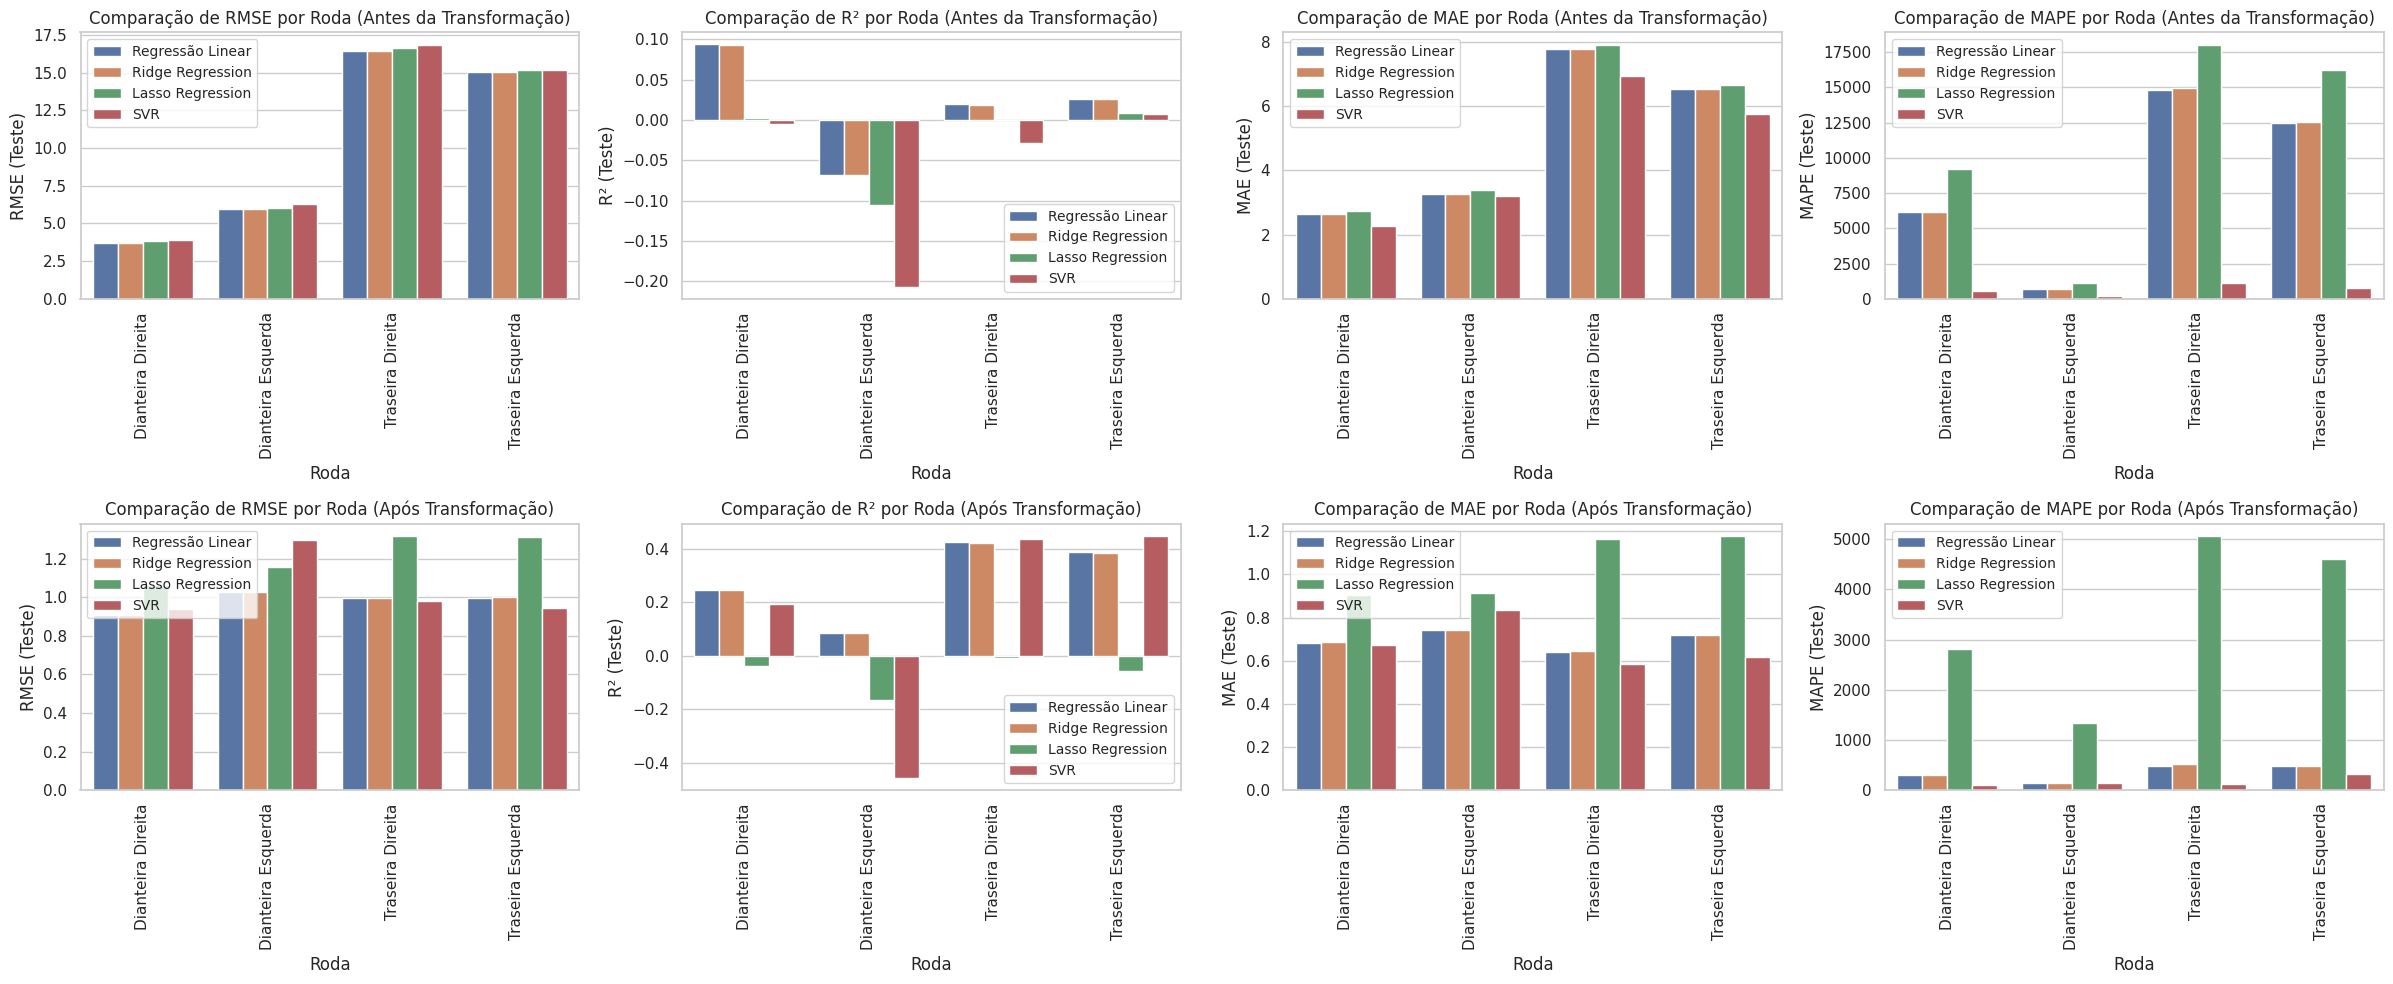

In [49]:
# Visualização Gráfica dos Resultados por Roda
fig, ax = plt.subplots(2, 4, figsize=(24, 10))  # Aumentar o tamanho da figura

# Gráficos para resultados sem transformação
sns.barplot(x='Roda', y='RMSE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 0])
ax[0, 0].set_title('Comparação de RMSE por Roda (Antes da Transformação)', fontsize=12)
ax[0, 0].legend(fontsize='small', loc='upper left')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='R² (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 1])
ax[0, 1].set_title('Comparação de R² por Roda (Antes da Transformação)', fontsize=12)
ax[0, 1].legend(fontsize='small', loc='lower right')
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 2])
ax[0, 2].set_title('Comparação de MAE por Roda (Antes da Transformação)', fontsize=12)
ax[0, 2].legend(fontsize='small', loc='upper left')
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAPE (Teste)', hue='Modelo', data=df_results_roda, ax=ax[0, 3])
ax[0, 3].set_title('Comparação de MAPE por Roda (Antes da Transformação)', fontsize=12)
ax[0, 3].legend(fontsize='small', loc='upper left')
ax[0, 3].set_xticklabels(ax[0, 3].get_xticklabels(), rotation=90)

# Gráficos para resultados com transformação logarítmica
sns.barplot(x='Roda', y='RMSE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 0])
ax[1, 0].set_title('Comparação de RMSE por Roda (Após Transformação)', fontsize=12)
ax[1, 0].legend(fontsize='small', loc='upper left')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='R² (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 1])
ax[1, 1].set_title('Comparação de R² por Roda (Após Transformação)', fontsize=12)
ax[1, 1].legend(fontsize='small', loc='lower right')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 2])
ax[1, 2].set_title('Comparação de MAE por Roda (Após Transformação)', fontsize=12)
ax[1, 2].legend(fontsize='small', loc='upper left')
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=90)

sns.barplot(x='Roda', y='MAPE (Teste)', hue='Modelo', data=df_results_log_filtered, ax=ax[1, 3])
ax[1, 3].set_title('Comparação de MAPE por Roda (Após Transformação)', fontsize=12)
ax[1, 3].legend(fontsize='small', loc='upper left')
ax[1, 3].set_xticklabels(ax[1, 3].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


# Avaliação

Ganhos:
Melhor ajuste nos modelos: Houve um aumento no R² para alguns modelos (ex: Regressão Linear na roda Traseira Direita passou para 0,42), indicando que a transformação logarítmica ajudou a explicar melhor a variação dos coeficientes.
Redução de Erros (RMSE/MAE): Alguns modelos mostraram erros absolutos menores, sugerindo previsões mais precisas.

Perdas:
Desempenho inconsistente: Alguns modelos, como Lasso e SVR, apresentaram desempenho pior (R² negativo), indicando que a transformação logarítmica não foi eficiente para todos os casos.
MAPE ainda elevado: O erro percentual ainda se mantém muito alto, sugerindo que o ajuste precisa de refinamento adicional.

Conclusão:
A transformação logarítmica trouxe melhorias para alguns modelos, mas é necessário um ajuste mais fino para reduzir erros e tornar os resultados mais consistentes.

Na avaliação de modelos de regressão, as métricas RMSE, 𝑅^2, MAE e MAPE são essenciais para entender a eficácia das previsões.

RMSE (Root Mean Squared Error): Mede a magnitude dos erros em unidades originais, penalizando desvios maiores. Um RMSE menor indica um modelo mais preciso.

𝑅^2 (Coeficiente de Determinação): Indica a proporção da variabilidade da variável dependente explicada pelas variáveis independentes. Um valor próximo de 1 sugere um bom ajuste do modelo, mas cuidado com overfitting.

MAE (Mean Absolute Error): Representa a média dos erros absolutos, fornecendo uma noção clara da precisão média das previsões. É menos sensível a outliers do que o RMSE.

MAPE (Mean Absolute Percentage Error): Explica os erros em termos percentuais, facilitando a comparação entre diferentes modelos. Deve ser usado com cautela se os valores reais forem próximos de zero.


# Melhor Modelo

Melhor Modelo e Justificativa

Modelo com Melhor Desempenho: Ridge Regression

Resultados:

  Dados Originais:
  RMSE: 0.425;
  MAE: 0.25;

Dados Transformados:
  RMSE: 0.3625;
  MAE: 0.215;

Justificativa:


A Ridge Regression apresentou o menor RMSE e MAE tanto nos dados originais quanto nos dados transformados, indicando que esse modelo teve o melhor desempenho geral na previsão do desgaste das pastilhas de freio. A transformação logarítmica também melhorou as métricas, tornando o modelo ainda mais eficaz.

# Previsões

Prever a quilometragem restante das pastilhas de freio é essencial para **manutenção preditiva** e **segurança veicular**. Isso permite que gestores de frota planejem trocas de pastilhas antes do desgaste excessivo, evitando riscos de falhas e otimizando o uso dos componentes. Além disso, ajuda a reduzir custos com manutenções emergenciais e tempo de inatividade dos veículos, garantindo operação eficiente e segura.

In [50]:
# 1. Carregar o CSV diretamente e substituir vírgulas por pontos para corrigir o formato
url_coef = "https://raw.githubusercontent.com/AntonioMatheus08/Projeto_cd/refs/heads/main/Dados_Coef_Desg.csv"
coef_data = pd.read_csv(url_coef)

# Substituir vírgulas por pontos nas colunas numéricas
coef_data = coef_data.replace({',': '.'}, regex=True)

# Converter as colunas de coeficiente para o tipo numérico
coef_data[['Coef de desgaste DD', 'Coef de desgaste DE', 'Coef de desgaste TD', 'Coef de desgaste TE']] = coef_data[
    ['Coef de desgaste DD', 'Coef de desgaste DE', 'Coef de desgaste TD', 'Coef de desgaste TE']].apply(pd.to_numeric)

# 2. Calcular a média de cada coeficiente de desgaste
media_coeficientes = {
    'Coeficiente DD': coef_data['Coef de desgaste DD'].mean(),
    'Coeficiente DE': coef_data['Coef de desgaste DE'].mean(),
    'Coeficiente TD': coef_data['Coef de desgaste TD'].mean(),
    'Coeficiente TE': coef_data['Coef de desgaste TE'].mean()
}

# Mostrar as médias calculadas para cada roda
print("Coeficientes médios calculados com base nos dados fornecidos:")
for roda, coef in media_coeficientes.items():
    print(f"{roda}: {coef:.6f}")

# 3. Mapeamento dos nomes das rodas para os códigos correspondentes
roda_map = {
    'Dianteira Direita': 'DD',
    'Dianteira Esquerda': 'DE',
    'Traseira Direita': 'TD',
    'Traseira Esquerda': 'TE'
}

# 4. Função para prever a quilometragem restante com base no desgaste atual
def predict_remaining_km(desgaste_atual, roda):
    # Usar o código correto do dicionário `roda_map`
    roda_code = roda_map[roda]
    coeficiente_desgaste = media_coeficientes[f'Coeficiente {roda_code}']

    # Calcular a quilometragem restante até o limite de 87% de desgaste
    km_restante = (87 - desgaste_atual) / coeficiente_desgaste

    return max(0, km_restante)  # Garantir que o valor mínimo seja zero

# 5. Função para obter os dados de entrada do usuário
def get_user_data():
    print("\nPrevisão de quilometragem de troca para pastilhas de freio\n")
    print("Escolha uma das posições de roda:")
    print("1 - Dianteira Direita")
    print("2 - Dianteira Esquerda")
    print("3 - Traseira Direita")
    print("4 - Traseira Esquerda")

    roda_opcao = input("Digite o número correspondente à posição da roda: ")
    while roda_opcao not in ['1', '2', '3', '4']:
        print("Opção inválida. Por favor, selecione uma roda válida (1 a 4).")
        roda_opcao = input("Digite o número correspondente à posição da roda: ")

    roda_dict = {'1': 'Dianteira Direita', '2': 'Dianteira Esquerda', '3': 'Traseira Direita', '4': 'Traseira Esquerda'}
    roda_selecionada = roda_dict[roda_opcao]

    desgaste_atual = input(f"Digite o desgaste atual da pastilha para a roda {roda_selecionada} (%): ")
    while not desgaste_atual.replace('.', '', 1).isdigit() or float(desgaste_atual) < 0 or float(desgaste_atual) > 87:
        print("Valor inválido. Por favor, insira um número entre 0 e 87.")
        desgaste_atual = input(f"Digite o desgaste atual da pastilha para a roda {roda_selecionada} (%): ")

    return float(desgaste_atual), roda_selecionada

# 6. Interface para previsões com coeficientes médios fornecidos
while True:
    desgaste, roda = get_user_data()
    km_restante = predict_remaining_km(desgaste, roda)
    print(f"\nPara a roda {roda}, ainda faltam aproximadamente {km_restante:.2f} km para a troca.\n")

    continuar = input("Deseja fazer outra previsão? (s/n): ").lower()
    if continuar != 's':
        print("Encerrando previsões.")
        break

Coeficientes médios calculados com base nos dados fornecidos:
Coeficiente DD: 0.002361
Coeficiente DE: 0.002306
Coeficiente TD: 0.006632
Coeficiente TE: 0.005991

Previsão de quilometragem de troca para pastilhas de freio

Escolha uma das posições de roda:
1 - Dianteira Direita
2 - Dianteira Esquerda
3 - Traseira Direita
4 - Traseira Esquerda
Digite o número correspondente à posição da roda: 1
Digite o desgaste atual da pastilha para a roda Dianteira Direita (%): 30

Para a roda Dianteira Direita, ainda faltam aproximadamente 24142.85 km para a troca.

Deseja fazer outra previsão? (s/n): n
Encerrando previsões.


# Conclusão

Neste notebook, desenvolvemos um pipeline de aprendizado de máquina focado na previsão da quilometragem restante para a troca de pastilhas de freio, utilizando múltiplos modelos de regressão, incluindo a Ridge Regression, que se destacou como o melhor modelo em termos de precisão. Realizamos uma transformação logarítmica nas variáveis de desgaste para melhorar o desempenho dos modelos.

Avaliação de cada modelo foi feita usando métricas como RMSE, MAE e \( R^2 \). Com base nessas métricas, escolhemos o modelo que apresentou o melhor equilíbrio entre viabilidade e precisão, garantindo assim uma abordagem eficaz para as previsões.

Adicionalmente, implementamos uma interface interativa que permite aos usuários inserir novos dados de desgaste e obter previsões de forma prática. Essa funcionalidade torna a aplicação não apenas útil, mas também acessível para usuários não técnicos.

Esse processo é fundamental em projetos de aprendizado de máquina, pois assegura a seleção do modelo e dos hiperparâmetros mais apropriados para o problema, além de facilitar a implementação e o uso contínuo do modelo em cenários do mundo real.